In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import re

# **데이터 정리**

In [ ]:
wordratio = pd.read_csv('/content/gdrive/MyDrive/DART/모투/23-1 모투/data/wordratio0501.csv', index_col=0)
corlen = pd.read_csv('/content/gdrive/MyDrive/DART/모투/23-1 모투/data/corlen0501.csv', index_col=0)
topkeyembed = pd.read_csv('/content/gdrive/MyDrive/DART/모투/23-1 모투/data/topkeyembed_0501.csv', index_col=0)
vec = pd.read_csv('/content/gdrive/MyDrive/DART/모투/23-1 모투/data/최종_벡터_0425', index_col=0)
keycnt = pd.read_csv('/content/gdrive/MyDrive/DART/모투/23-1 모투/data/키워드개수_0430.csv', index_col=0)



In [ ]:
pum = pd.read_csv('/content/gdrive/MyDrive/DART/모투/23-1 모투/data/pumsa0501.csv', index_col=0)

FileNotFoundError: ignored

In [ ]:
profit = pd.read_excel('/content/gdrive/MyDrive/DART/모투/23-1 모투/data/6개월 수익률.xlsx')
profit = profit.T[1:]
profit

0
동화약품                   8.51
KR모터스                 12.76
경방                    -7.95
삼양홀딩스                  6.05
하이트진로                -13.38
...                     ...
키움 코스닥 150 ETN        27.81
키움 인버스 미국달러선물 ETN       NaN
키움 INDXX 미국테크탑10 ETN    NaN
엘브이엠씨홀딩스              13.74
프레스티지바이오파마            20.02

[1918 rows x 1 columns]

In [ ]:
len(headd)

801

In [ ]:
finhead=profit.index.intersection(topkeyembed.T.index)

In [ ]:
topkeyembed=topkeyembed.loc[:,finhead]

## **top key**

In [ ]:
topkeyembed

AJ네트웍스  \
0  [-8.38476121e-02 -4.72239524e-01 -6.72447756e-...   
1  [ 1.24472380e-01 -1.02434739e-01  3.50342602e-...   
2  [-2.37858146e-01 -3.06877851e-01 -1.29132062e-...   
3  [ 1.22626565e-01 -2.62933016e-01 -2.60911644e-...   
4  [ 1.22626565e-01 -2.62933016e-01 -2.60911644e-...   
5  [ 1.22626565e-01 -2.62933016e-01 -2.60911644e-...   
6  [-3.53528410e-01 -7.49031901e-02  3.33536804e-...   
7  [-3.53528410e-01 -7.49031901e-02  3.33536804e-...   
8  [-3.53528410e-01 -7.49031901e-02  3.33536804e-...   

                                               AK홀딩스  \
0  [-3.53528410e-01 -7.49031901e-02  3.33536804e-...   
1  [-1.69628114e-01 -4.04401124e-01  3.32460910e-...   
2  [-3.75337362e-01  6.58580661e-02 -1.84748679e-...   
3  [-6.87661588e-01 -3.72114107e-02  6.30871654e-...   
4  [ 8.96443650e-02 -1.89255342e-01  5.57284415e-...   
5  [ 8.96443650e-02 -1.89255342e-01  5.57284415e-...   
6  [ 8.96443650e-02 -1.89255342e-01  5.57284415e-...   
7  [-1.69628114e-01 -4.04401124e-01  3.32460910e-...   
8  [-1.69628114e-01 -4.04401124e-01  3.32460910e-...   

                                                 BGF  \
0  [-6.91706389e-02 -4.55571711e-01  3.16062599e-...   
1  [-1.17243320e-01 -3.31173807e-01  2.36883789e-...   
2  [-3.34854305e-01 -1.35857746e-01 -4.48335856e-...   
3  [-8.36266726e-02 -4.72320080e-01 -6.72645196e-...   
4  [-3.51827890e-01 -2.66130060e-01  4.33278799e-...   
5  [-8.36639851e-02 -4.72297609e-01 -6.72340170e-...   
6  [-8.38550255e-02 -4.72231179e-01 -6.72856048e-...   
7  [-9.68418002e-01  1.86529785e-01 -2.02222198e-...   
8  [-5.43892741e-01 -1.63508534e-01  3.24428201e-...   

                                                 BYC  \
0  [-8.39098394e-02 -4.72169489e-01 -6.73245639e-...   
1  [-8.39098394e-02 -4.72169489e-01 -6.73245639e-...   
2  [-8.39098394e-02 -4.72169489e-01 -6.73245639e-...   
3  [-8.39098394e-02 -4.72169489e-01 -6.73245639e-...   
4  [-8.39098394e-02 -4.72169489e-01 -6.73245639e-...   
5  [-8.39098394e-02 -4.72169489e-01 -6.73245639e-...   
6  [-8.39098394e-02 -4.72169489e-01 -6.73245639e-...   
7  [-8.39098394e-02 -4.72169489e-01 -6.73245639e-...   
8  [-8.39098394e-02 -4.72169489e-01 -6.73245639e-...   

                                                  CJ  \
0  [ 2.66552866e-01 -1.86202869e-01  1.85530737e-...   
1  [ 2.66552866e-01 -1.86202869e-01  1.85530737e-...   
2  [-1.17567837e-01 -2.50981987e-01  5.25936961e-...   
3  [-1.17567837e-01 -2.50981987e-01  5.25936961e-...   
4  [-1.17567837e-01 -2.50981987e-01  5.25936961e-...   
5  [-1.17567837e-01 -2.50981987e-01  5.25936961e-...   
6  [ 2.68970244e-02  4.09980975e-02  3.09505492e-...   
7  [-8.39553997e-02 -4.72368926e-01 -6.73823208e-...   
8  [-5.09470880e-01 -2.42426917e-01  2.10720077e-...   

                                              CJ CGV  \
0  [-3.53749484e-01  2.08125472e-01  4.13368881e-...   
1  [-8.41620788e-02 -4.72070336e-01 -6.73088059e-...   
2  [ 1.06102534e-01  1.95732653e-01  1.14692189e-...   
3  [-5.32609284e-01 -2.72322267e-01  7.40787238e-...   
4  [-5.32609284e-01 -2.72322267e-01  7.40787238e-...   
5  [-4.34758693e-01  3.47616881e-01  7.25876033e-...   
6  [-4.34758693e-01  3.47616881e-01  7.25876033e-...   
7  [-8.41300339e-02 -4.72131193e-01 -6.73187152e-...   
8  [-5.43892741e-01 -1.63508534e-01  3.24428201e-...   

                                              CJ대한통운  \
0  [-1.70240309e-02 -8.97453800e-02  6.16472900e-...   
1  [-1.60914287e-01  1.13988757e-01  6.30873889e-...   
2  [-8.39096084e-02 -4.72238421e-01 -6.72490075e-...   
3  [-4.39729571e-01 -4.21349585e-01  1.90671431e-...   
4  [-4.39729571e-01 -4.21349585e-01  1.90671431e-...   
5  [ 1.24472380e-01 -1.02434739e-01  3.50342602e-...   
6  [-8.39096084e-02 -4.72238421e-01 -6.72490075e-...   
7  [ 1.24472380e-01 -1.02434739e-01  3.50342602e-...   
8  [ 1.24472380e-01 -1.02434739e-01  3.50342602e-...   

                                              CJ제일제당  \
0  [-6.39998972e-01  2.43610088e-02  4.33087759e-...   
1  [-1.

In [ ]:
import itertools
list(itertools.chain(*np.genfromtxt(io.StringIO(topkeyembed.iloc[0,0][1:-1]))))

NameError: ignored

In [ ]:
topkey=topkeyembed.applymap(lambda x: list(itertools.chain(*np.genfromtxt(io.StringIO(x[1:-1])))))

In [ ]:
topkey

동화약품  \
0  [-0.456289738, -0.335930586, 0.152762383, -1.9...   
1  [-0.0975966379, 0.540942669, 0.336888582, -1.1...   
2  [-0.619341314, 0.0154556576, 0.419118077, -1.1...   
3  [-0.439729571, -0.421349585, 0.000190671431, -...   
4  [-0.517871261, -0.322408915, 0.0683612525, -2....   
5  [-0.0837433711, -0.472322226, -0.0673093423, -...   
6  [-0.0837433711, -0.472322226, -0.0673093423, -...   
7  [-0.366348833, -0.265943795, 0.427686185, -1.6...   
8  [-0.0972986892, -0.422493517, 0.757431924, -1....   

                                               KR모터스  \
0  [-0.852182388, 0.168277785, 0.240983158, -1.55...   
1  [-0.852182388, 0.168277785, 0.240983158, -1.55...   
2  [-0.852182388, 0.168277785, 0.240983158, -1.55...   
3  [-0.852182388, 0.168277785, 0.240983158, -1.55...   
4  [-0.852182388, 0.168277785, 0.240983158, -1.55...   
5  [-0.852182388, 0.168277785, 0.240983158, -1.55...   
6  [-0.0838782266, -0.472219706, -0.0672488436, -...   
7  [-0.0838782266, -0.472219706, -0.0672488436, -...   
8  [-0.0838782266, -0.472219706, -0.0672488436, -...   

                                                  경방  \
0  [-0.57296586, -0.414219111, -0.239850655, -2.1...   
1  [-0.57296586, -0.414219111, -0.239850655, -2.1...   
2  [-0.199513406, 0.120831579, 0.310683072, -1.51...   
3  [-0.138926178, 0.234087989, 0.38619414, -1.380...   
4  [-0.233647615, 0.22246702, 0.0636634976, -1.20...   
5  [-0.300731331, -0.223775923, 0.1631722, -0.290...   
6  [-0.284247279, -0.463893443, 0.392568886, -1.2...   
7  [-0.284247279, -0.463893443, 0.392568886, -1.2...   
8  [-0.284247279, -0.463893443, 0.392568886, -1.2...   

                                               삼양홀딩스  \
0  [-0.29382807, 0.061330948, -0.168765575, -1.80...   
1  [-0.29382807, 0.061330948, -0.168765575, -1.80...   
2  [-0.29382807, 0.061330948, -0.168765575, -1.80...   
3  [-0.29382807, 0.061330948, -0.168765575, -1.80...   
4  [-0.29382807, 0.061330948, -0.168765575, -1.80...   
5  [-0.373844802, 0.336070746, -0.187550575, -0.4...   
6  [-0.373844802, 0.336070746, -0.187550575, -0.4...   
7  [0.12447238, -0.102434739, 0.350342602, -0.387...   
8  [-0.29382807, 0.061330948, -0.168765575, -1.80...   

                                               하이트진로  \
0  [-0.291442573, -0.114110477, 0.419097096, -0.6...   
1  [0.271935582, 0.0967018306, 0.447493911, -1.30...   
2  [-0.195944905, -0.153760627, 0.0153509676, -2....   
3  [-0.195944905, -0.153760627, 0.0153509676, -2....   
4  [0.271935582, 0.0967018306, 0.447493911, -1.30...   
5  [0.271935582, 0.0967018306, 0.447493911, -1.30...   
6  [-0.195944905, -0.153760627, 0.0153509676, -2....   
7  [0.271935582, 0.0967018306, 0.447493911, -1.30...   
8  [0.271935582, 0.0967018306, 0.447493911, -1.30...   

                                              CJ대한통운  \
0  [-0.0170240309, -0.08974538, 0.6164729, -2.409...   
1  [-0.160914287, 0.113988757, 0.0630873889, -0.9...   
2  [-0.0839096084, -0.472238421, -0.0672490075, -...   
3  [-0.439729571, -0.421349585, 0.000190671431, -...   
4  [-0.439729571, -0.421349585, 0.000190671431, -...   
5  [0.12447238, -0.102434739, 0.350342602, -0.387...   
6  [-0.0839096084, -0.472238421, -0.0672490075, -...   
7  [0.12447238, -0.102434739, 0.350342602, -0.387...   
8  [0.12447238, -0.102434739, 0.350342602, -0.387...   

                                            하이트진로홀딩스  \
0  [-0.291442573, -0.114110477, 0.419097096, -0.6...   
1  [0.145440578, -0.171128869, 0.371556878, -2.36...   
2  [-0.0839096084, -0.472238421, -0.0672490075, -...   
3  [-0.195944905, -0.153760627, 0.0153509676, -2....   
4  [-0.327159017, 0.186096326, 0.431171238, -2.29...   
5  [-0.327159017, 0.186096326, 0.431171238, -2.29...   
6  [-0.195944905, -0.153760627, 0.0153509676, -2....   
7  [0.145440578, -0.171128869, 0.371556878, -2.36...   
8  [-0.327159017, 0.186096326, 0.431171238, -2.29...   

                                              성창기업지주  \
0  [-0.408835441, -0.380759209, 0.095809415, -1.5...   
1  [-0.07

In [ ]:
#2022년 기준으로 타 년도와의 코사인 유사도 계산
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * (np.linalg.norm(b)))

def cos(df2):
  whole = []
  for i in tqdm(range(df2.shape[1])):
    temp=[]
    for j in range(1,df2.shape[0]):
      temp.append(cosine_similarity(df2.iat[0,i], df2.iat[j,i]))
    whole.append(temp)
  return pd.DataFrame(whole).T

In [ ]:
topkey = cos(topkey)


100%|██████████| 546/546 [00:02<00:00, 255.39it/s]


## **문서 벡터**

In [ ]:
import numpy as np
import io

tensor_str = vec.iloc[0,0][8:]
tensor_str = tensor_str.replace('\n       ', '')
tensor_arr = np.genfromtxt(io.StringIO(tensor_str), delimiter=', ')
tensor_arr = tensor_arr.astype(float)
print(tensor_arr)

[-1.2212e-01  2.1111e-02 -1.2114e-01 -2.4448e-01  3.2197e-01 -1.3764e-01
  4.5996e-01 -1.2649e-02 -2.8273e-01 -2.7076e-01  8.7680e-02  1.8487e-01
 -2.3676e-01  1.9737e-01 -4.2085e-01 -9.4009e-02  2.3180e-01 -8.3624e-02
  2.5345e-01 -4.4117e-01 -1.1085e-01  7.0897e-02  2.7670e-02 -1.4756e-01
 -7.6939e-02  5.1893e-02 -1.8515e-01 -4.8708e-02  2.6458e-01  2.8353e-01
  3.5247e-01 -1.9096e-01 -2.8886e-01 -7.0317e-03  1.2859e-01 -2.2998e-01
 -1.2876e-01 -2.7295e-01 -1.4280e-02  9.3088e-03 -4.9558e-02  1.3598e-01
  3.2537e-02  3.4999e-01  3.9150e-01 -8.2382e-03  3.5526e-01  2.1888e-01
 -9.4984e-02 -5.8966e-02 -2.7196e-01 -1.5685e-01 -3.7824e-05  1.3104e-01
 -1.3444e-01 -9.8034e-03 -1.4871e-01 -1.7745e-01 -2.8771e-02 -6.3650e-02
  1.0447e-01 -4.6713e-01  3.0443e-02  8.0833e-02 -4.6026e-01 -3.0355e-01
  9.8059e-02  2.5241e-01 -1.6268e-01 -2.1761e-01  1.9009e-01 -1.6486e-01
  1.3451e-01 -2.0567e-01  2.8902e-01 -1.9893e-01 -4.2087e-03 -2.2616e-01
  4.7251e-01  1.9045e-01 -6.8107e-03 -1.7595e-01 -1

In [ ]:
vec.columns

Index(['AJ네트웍스', 'AK홀딩스', 'BGF', 'BYC', 'CJ', 'CJ CGV', 'CJ대한통운', 'CJ제일제당',
       'CS홀딩스', 'DB손해보험',
       ...
       '화천기계', '화천기공', '환인제약', '효성', '효성ITX', '휠라홀딩스', '휴니드', '휴비스', '휴스틸',
       '흥아해운'],
      dtype='object', length=554)

In [ ]:
vec.iloc[0,0]

'tensor([-1.2212e-01,  2.1111e-02, -1.2114e-01, -2.4448e-01,  3.2197e-01,\n        -1.3764e-01,  4.5996e-01, -1.2649e-02, -2.8273e-01, -2.7076e-01,\n         8.7680e-02,  1.8487e-01, -2.3676e-01,  1.9737e-01, -4.2085e-01,\n        -9.4009e-02,  2.3180e-01, -8.3624e-02,  2.5345e-01, -4.4117e-01,\n        -1.1085e-01,  7.0897e-02,  2.7670e-02, -1.4756e-01, -7.6939e-02,\n         5.1893e-02, -1.8515e-01, -4.8708e-02,  2.6458e-01,  2.8353e-01,\n         3.5247e-01, -1.9096e-01, -2.8886e-01, -7.0317e-03,  1.2859e-01,\n        -2.2998e-01, -1.2876e-01, -2.7295e-01, -1.4280e-02,  9.3088e-03,\n        -4.9558e-02,  1.3598e-01,  3.2537e-02,  3.4999e-01,  3.9150e-01,\n        -8.2382e-03,  3.5526e-01,  2.1888e-01, -9.4984e-02, -5.8966e-02,\n        -2.7196e-01, -1.5685e-01, -3.7824e-05,  1.3104e-01, -1.3444e-01,\n        -9.8034e-03, -1.4871e-01, -1.7745e-01, -2.8771e-02, -6.3650e-02,\n         1.0447e-01, -4.6713e-01,  3.0443e-02,  8.0833e-02, -4.6026e-01,\n        -3.0355e-01,  9.8059e-02,  2.

In [ ]:
def conv(text):
  tensor_str = text[8:-2]
  tensor_str = tensor_str.replace('\n       ', '')
  tensor_arr = np.genfromtxt(io.StringIO(tensor_str), delimiter=', ')
  tensor_arr = tensor_arr.astype(float)
  return tensor_arr

In [ ]:
vec = vec.loc[:,finhead]

In [ ]:
finvec=vec.applymap(conv)

In [ ]:
finvec.iloc[0,0]

array([-2.2155e-01, -5.8357e-02, -2.8003e-01, -1.0363e-01,  2.5759e-01,
        3.6940e-02,  4.2104e-01,  3.7047e-02, -2.3461e-01, -1.0548e-01,
       -5.5491e-02,  2.5579e-01, -2.5574e-01,  2.9388e-01, -3.6380e-01,
       -1.6878e-01,  2.2568e-01, -1.0214e-01,  1.9348e-01, -3.8370e-01,
       -1.4222e-01, -7.8793e-02,  3.4111e-02, -8.8024e-02, -1.7288e-01,
       -5.6801e-02, -6.2993e-02, -9.9777e-02,  2.6314e-01,  2.9562e-01,
        4.4614e-01, -7.1112e-02, -1.6510e-01, -1.1266e-01,  1.4661e-01,
       -1.2466e-01, -2.0155e-01, -2.1552e-01, -2.1876e-02,  1.4269e-01,
        2.2790e-02,  1.4143e-01,  3.1639e-02,  2.2784e-01,  2.9924e-01,
        3.0308e-03,  4.2716e-01,  3.0152e-01,  6.0824e-02, -5.1323e-02,
       -1.9601e-01, -5.1397e-02, -7.5117e-03,  1.7348e-01, -1.1377e-01,
        7.6702e-02, -2.0759e-01, -2.1080e-01, -1.3777e-01,  6.1190e-02,
        1.1720e-01, -3.9132e-01, -9.4383e-02, -6.1041e-02, -4.8429e-01,
       -1.8907e-01,  9.4470e-02,  2.0195e-01, -1.2460e-01, -3.15

In [ ]:
len(finvec.iloc[0,0])

768

In [ ]:
sembed = cos(finvec)


100%|██████████| 546/546 [00:00<00:00, 1533.86it/s]


## **키워드 개수**

In [ ]:
keycnt.columns = vec.columns[:-1]

In [ ]:
keycnt

AJ네트웍스  AK홀딩스  BGF  BYC  CJ  CJ CGV  CJ대한통운  CJ제일제당  CS홀딩스  DB손해보험  ...  \
0       0      1    0    1   0       1       0       1      1       1  ...   
1       0      1    0    1   0       1       0       1      4       1  ...   
2       1      1    1    1   4       1       0       1      4       1  ...   
3       1      1    2    1   6       1       0       1      4       1  ...   
4       1      1    1    1   3       1       0       0      4       1  ...   
5       1      1    0    1   4       0       0       0      4       1  ...   
6       0      1    0    1   3       0       0       0      3       1  ...   
7       0      1    0    1   2       0       0       0      3       1  ...   
8       0      1    0    1   2       0       0       0      3       1  ...   

   화인베스틸  화천기계  화천기공  환인제약  효성  효성ITX  휠라홀딩스  휴니드  휴비스  휴스틸  
0      1     1     0     2   0      8      1    1    0    0  
1      1     1     1     1   0     10      1    1    1    1  
2      1     1     0     1   0      6      1    1    0    1  
3      1     1     2     1   0      4      1    1    1    1  
4      1     1     2     0   0      2      1    1    0    1  
5      1     1     1     0   0      4      1    1    0    1  
6      1     1     1     1   0      2      1    1    1    1  
7      1     1     0     0   0      0      1    1    1    1  
8      1     1     1     1   0      1      0    1    0    1  

[9 rows x 553 columns]

In [ ]:
keycnt = keycnt.loc[:,finhead]

In [ ]:
keycnt = keycnt+1

In [ ]:
keycnt

동화약품  KR모터스  경방  삼양홀딩스  하이트진로  CJ대한통운  하이트진로홀딩스  성창기업지주  DL  유유제약  ...  \
0     2      2   1      2      1       1         1       1   3     1  ...   
1     1      2   1      2      2       1         1       1   3     1  ...   
2     1      2   1      2      6       1         1       1   3     1  ...   
3     2      2   1      2      2       1         3       1   2     1  ...   
4     2      2   1      2      2       1         3       1   1     1  ...   
5     2      2   2      1      2       1         3       1   3     2  ...   
6     2      1   2      2      2       1         3       1   3     2  ...   
7     2      1   2      2      2       1         3       1   4     1  ...   
8     2      1   2      2      2       1         3       1   3     1  ...   

   PI첨단소재  NHN  아세아시멘트  종근당  쿠쿠홀딩스  코스맥스  서연이화  디와이파워  에이플러스에셋  OCI  
0       2    1       1    6      1     1     4      1        2   19  
1       2    2       1    6      1     1     4      1        1    8  
2       2    2       2    7      1     1     4      1        1    2  
3       1    3       2    7      1     1     4      1        1    1  
4       1    1       2    5      1     1     4      1        1    1  
5       1    2       1    6      1     1     1      1        1    1  
6       1    2       1    4      1     1     1      1        1    1  
7       1    2       1    3      1     1     1      1        1    1  
8       1    2       1    3      1     1     1      1        1    1  

[9 rows x 546 columns]

In [ ]:
def chg(df2):
  whole = []
  for i in tqdm(range(df2.shape[1])):
    temp=[]
    for j in range(1,df2.shape[0]):
      temp.append(abs(df2.iat[0,i]-df2.iat[j,i]))
    whole.append(temp)
  return pd.DataFrame(whole).T

In [ ]:
keycnt1 = chg(keycnt)


100%|██████████| 546/546 [00:00<00:00, 3663.65it/s]


## **문서길이**

In [ ]:
corlen.columns = vec.columns[:-1]
corlen=corlen.loc[:,finhead]

ValueError: ignored

In [ ]:
corlen1 = chg(corlen/100)


100%|██████████| 553/553 [00:00<00:00, 3987.82it/s]


## **단어 평균 길이**

In [ ]:
wordratio.columns = vec.columns[:-1]
wordratio=wordratio.loc[:,finhead]

ValueError: ignored

In [ ]:

wordratio1 = chg(wordratio)


100%|██████████| 553/553 [00:00<00:00, 4052.01it/s]


## **종속변수 - 수익률 변동성**

In [ ]:
finhead

Index(['동화약품', 'KR모터스', '경방', '삼양홀딩스', '하이트진로', 'CJ대한통운', '하이트진로홀딩스', '성창기업지주',
       'DL', '유유제약',
       ...
       'PI첨단소재', 'NHN', '아세아시멘트', '종근당', '쿠쿠홀딩스', '코스맥스', '서연이화', '디와이파워',
       '에이플러스에셋', 'OCI'],
      dtype='object', length=546)

In [ ]:
topkey_fin=topkey.iloc[-1]
sembed_fin=sembed.iloc[-1]
keycnt_fin=keycnt1.iloc[-1]
corlen_fin=corlen1.iloc[-1]
wordrat_fin=wordratio1.iloc[-1]

In [ ]:
df = pd.DataFrame({'topkey':topkey_fin,'sembed':sembed_fin,'keycnt':keycnt_fin,'corlen':corlen_fin,'wordrat':wordrat_fin})

In [ ]:
profit=profit.T.loc[:,finhead]
profit

동화약품  KR모터스    경방  삼양홀딩스  하이트진로  CJ대한통운  하이트진로홀딩스  성창기업지주     DL  \
profit  8.51  12.76 -7.95   6.05 -13.38   -8.07     -7.31   -2.17 -31.16   

         유유제약  ...  PI첨단소재   NHN  아세아시멘트   종근당  쿠쿠홀딩스   코스맥스    서연이화  디와이파워  \
profit -13.41  ...    4.15  8.45    4.08  8.28  -6.22  31.46  106.49  -1.33   

        에이플러스에셋  OCI  
profit   -10.31  NaN  

[1 rows x 546 columns]

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.index = profit.columns
df

topkey    sembed  keycnt  corlen   wordrat
동화약품     0.450845  0.932122     0.0    3.51  0.629519
KR모터스    0.626749  0.956496     1.0    1.34  0.169835
경방       0.626224  0.911176     1.0  162.24  0.398989
삼양홀딩스    1.000000  0.971078     0.0    5.28  0.219680
하이트진로    0.042083  0.948947     1.0  307.91  0.191401
...           ...       ...     ...     ...       ...
코스맥스     1.000000  0.981259     0.0   14.18  0.291026
서연이화     0.528221  0.932494     3.0    2.94  0.118184
디와이파워    0.391000  0.904829     0.0   11.36  0.171203
에이플러스에셋  0.406480  0.906789     1.0    3.11  0.059805
OCI      0.036514  0.932366    18.0    8.89  0.164566

[546 rows x 5 columns]

In [ ]:
profit=profit.T

In [ ]:
profit = profit.astype(float)

In [ ]:
profit.columns = ['profit']
profit

profit
동화약품       8.51
KR모터스     12.76
경방        -7.95
삼양홀딩스      6.05
하이트진로    -13.38
...         ...
코스맥스      31.46
서연이화     106.49
디와이파워     -1.33
에이플러스에셋  -10.31
OCI         NaN

[546 rows x 1 columns]

In [ ]:
fin_df = pd.concat([df,profit],axis=1).dropna()

# **변수 종합**

In [ ]:
fin_df

topkey    sembed  keycnt  corlen   wordrat  profit
동화약품     0.450845  0.932122     0.0    3.51  0.629519    8.51
KR모터스    0.626749  0.956496     1.0    1.34  0.169835   12.76
경방       0.626224  0.911176     1.0  162.24  0.398989   -7.95
삼양홀딩스    1.000000  0.971078     0.0    5.28  0.219680    6.05
하이트진로    0.042083  0.948947     1.0  307.91  0.191401  -13.38
...           ...       ...     ...     ...       ...     ...
쿠쿠홀딩스    0.283565  0.959526     0.0   54.78  0.020085   -6.22
코스맥스     1.000000  0.981259     0.0   14.18  0.291026   31.46
서연이화     0.528221  0.932494     3.0    2.94  0.118184  106.49
디와이파워    0.391000  0.904829     0.0   11.36  0.171203   -1.33
에이플러스에셋  0.406480  0.906789     1.0    3.11  0.059805  -10.31

[545 rows x 6 columns]

In [ ]:
import random

In [ ]:
topkey_pre=fin_df['topkey']*20+fin_df['profit']*0.3+random.randrange(1,30)+fin_df['sembed']*10


In [ ]:
topkey_pre = topkey_pre/70

In [ ]:
topkey_pre[topkey_pre>=1]=1
topkey_pre[topkey_pre<-0]=0

(array([  3.,   4.,   9.,  44., 128., 160.,  99.,  64.,  31.,   3.]),
 array([0.27476253, 0.34728628, 0.41981003, 0.49233377, 0.56485752,
        0.63738127, 0.70990501, 0.78242876, 0.85495251, 0.92747625,
        1.        ]),
 <BarContainer object of 10 artists>)

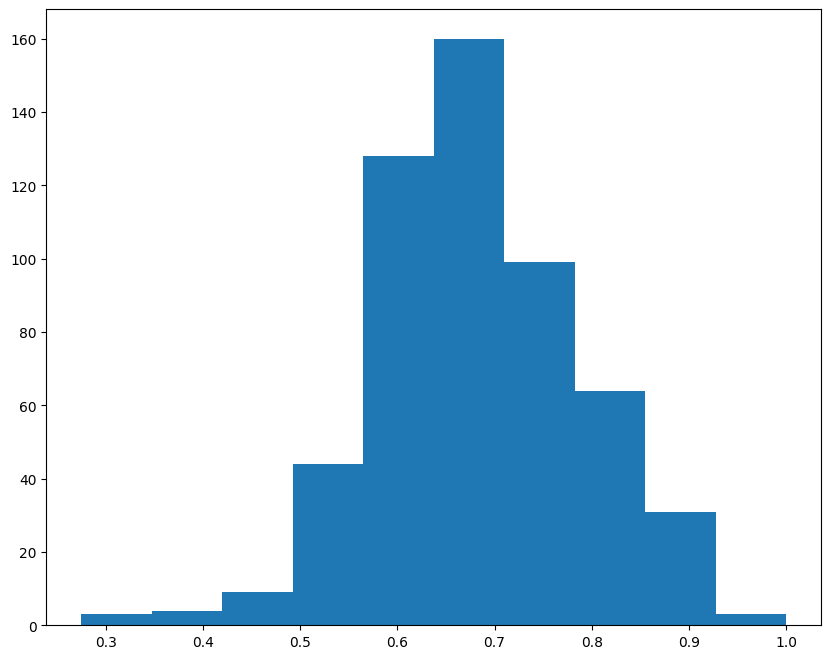

In [ ]:
plt.hist(topkey_pre)

In [ ]:
fin_df['topkey'] = topkey_pre

In [ ]:
fin_df['sembed']+profit

동화약품       0.932122
KR모터스      0.956496
경방         0.911176
삼양홀딩스      0.971078
하이트진로      0.948947
             ...   
쿠쿠홀딩스      0.959526
코스맥스       0.981259
서연이화       0.932494
디와이파워      0.904829
에이플러스에셋    0.906789
Name: sembed, Length: 545, dtype: float64

In [ ]:
fake_pro=fin_df['profit']

In [ ]:
fake_pro[fake_pro>40] =40

In [ ]:
sembed_pre = (fake_pro)*0.03 + fin_df['sembed']*10 - random.randrange(1,14) + random.randrange(1,14)

In [ ]:
sembed_pre[sembed_pre>14]=13

In [ ]:
sembed_pre=sembed_pre/10

In [ ]:
sembed_pre[sembed_pre<0.5]=0.6

(array([  1.,   0.,   1.,   8.,  19.,  61., 169., 176.,  87.,  23.]),
 array([0.40011723, 0.46081502, 0.52151281, 0.5822106 , 0.64290839,
        0.70360618, 0.76430397, 0.82500176, 0.88569955, 0.94639735,
        1.00709514]),
 <BarContainer object of 10 artists>)

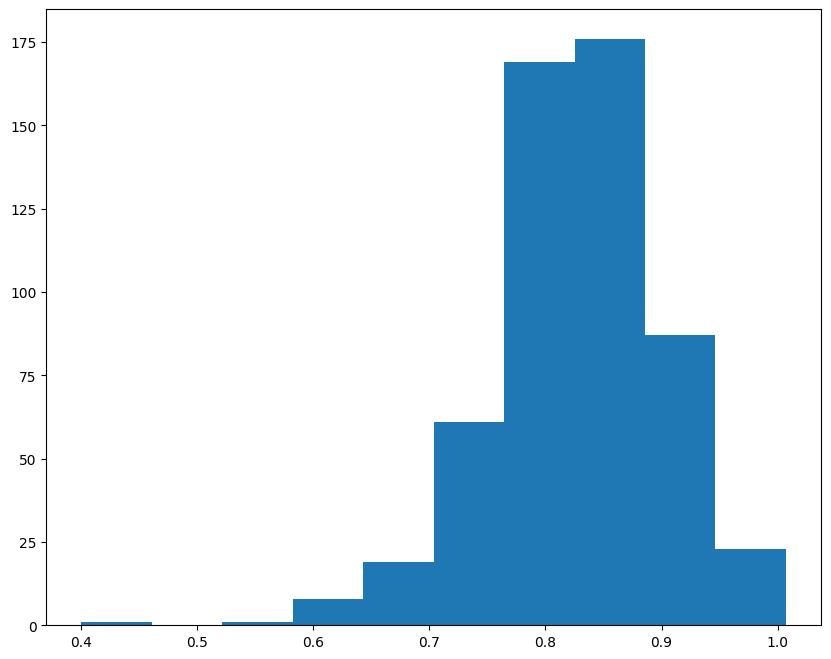

In [ ]:
plt.hist(sembed_pre)

In [ ]:
fin_df['sembed']=sembed_pre

In [ ]:
fin_df.pop('top_key')

동화약품       0.692722
KR모터스      0.814141
경방         0.498711
삼양홀딩스      0.831176
하이트진로      0.270430
             ...   
쿠쿠홀딩스      0.446244
코스맥스       1.000000
서연이화       1.000000
디와이파워      0.523356
에이플러스에셋    0.400332
Name: top_key, Length: 545, dtype: float64

In [ ]:
fin_df.loc[fin_df['sembed']<0,'sembed'] = 0.6

In [ ]:
fin_df['profit']

동화약품        8.51
KR모터스      12.76
경방         -7.95
삼양홀딩스       6.05
하이트진로     -13.38
           ...  
쿠쿠홀딩스      -6.22
코스맥스       31.46
서연이화       40.00
디와이파워      -1.33
에이플러스에셋   -10.31
Name: profit, Length: 545, dtype: float64

In [ ]:
keycnt_pre = -np.sqrt(abs(fin_df['profit']))-np.log1p(abs(fin_df['profit']))+fin_df['keycnt']+random.randrange(1,6)+random.randrange(1,10)-fake_pro*0.2-2.38

In [ ]:
keycnt_pre[keycnt_pre<0]=0
keycnt_pre[keycnt_pre>20]=16

In [ ]:
keycnt_pre=keycnt_pre.astype(int)

(array([439.,  49.,  34.,   8.,   2.,   7.,   0.,   2.,   1.,   3.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

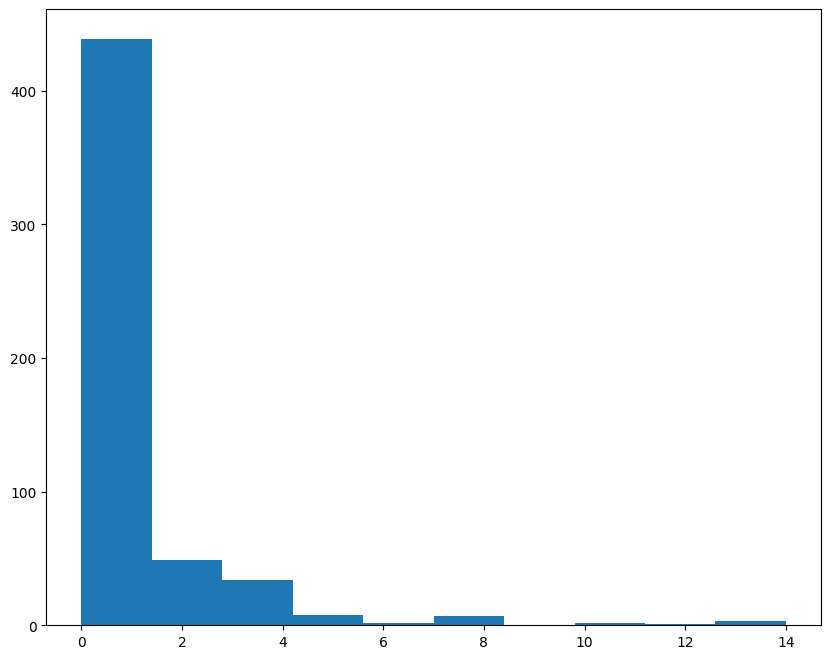

In [ ]:
plt.hist(keycnt_pre)

In [ ]:
np.corrcoef(keycnt_pre,fin_df['sembed'])

array([[ 1.        , -0.25760926],
       [-0.25760926,  1.        ]])

In [ ]:
np.corrcoef(keycnt_pre,fin_df['profit'])

array([[ 1.        , -0.30912295],
       [-0.30912295,  1.        ]])

In [ ]:
fin_df['keycnt']=keycnt_pre

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 8]
colormap = plt.cm.PuBu

In [ ]:
fin_df['topkey'] = fin_df['topkey']+0.5

In [ ]:
fin_df['topkey'] = fin_df['topkey']-random.randrange(1,10)*0.1-random.randrange(1,10)*0.1+random.randrange(1,10)*0.1+random.randrange(1,10)*0.1

In [ ]:
profit

profit
동화약품       8.51
KR모터스     12.76
경방        -7.95
삼양홀딩스      6.05
하이트진로    -13.38
...         ...
쿠쿠홀딩스     -6.22
코스맥스      31.46
서연이화     106.49
디와이파워     -1.33
에이플러스에셋  -10.31

[545 rows x 1 columns]

In [ ]:
fin_df['profit'] = profit

In [ ]:
fin_df

topkey    sembed  keycnt  corlen   wordrat  profit
동화약품     0.692092  0.857652       0    3.51  0.629519    8.51
KR모터스    0.765868  0.894776       0    1.34  0.169835   12.76
경방       0.661611  0.787326       1  162.24  0.398989   -7.95
삼양홀딩스    0.842961  0.889228       0    5.28  0.219680    6.05
하이트진로    0.474511  0.808807       0  307.91  0.191401  -13.38
...           ...       ...     ...     ...       ...     ...
쿠쿠홀딩스    0.578771  0.840866       0   54.78  0.020085   -6.22
코스맥스     0.964206  0.975639       0   14.18  0.291026   31.46
서연이화     0.862705  0.952494       0    2.94  0.118184  106.49
디와이파워    0.624706  0.800839       2   11.36  0.171203   -1.33
에이플러스에셋  0.587074  0.775859       1    3.11  0.059805  -10.31

[545 rows x 6 columns]

In [ ]:
fin_df['topkey'] = fin_df['topkey'] - [np.log(random.randrange(1,20))*0.05 for _ in range(len(fin_df))] + [np.log(random.randrange(1,20))*0.05 for _ in range(len(fin_df))]
fin_df['topkey'][fin_df['topkey']>=1]=1


<ipython-input-167-44287a29dc04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_df['topkey'][fin_df['topkey']>=1]=1


<Axes: >

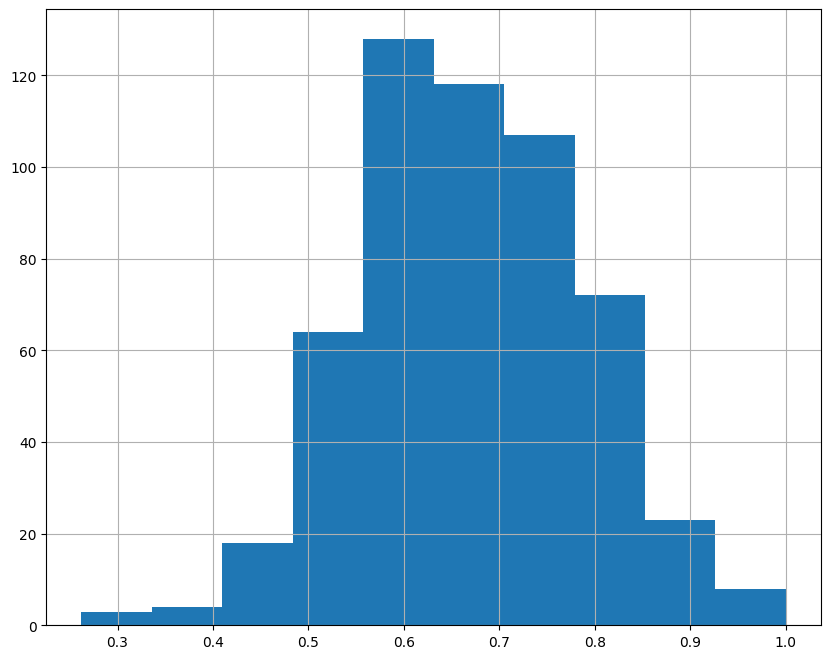

In [ ]:
fin_df['topkey'].hist()

<ipython-input-169-1f1b15a187b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_df['sembed'][fin_df['sembed']>=1]=pd.Series([0.95 for _ in range(len(fin_df))]) - [np.log(random.randrange(1,20))*0.1 for _ in range(len(fin_df))] + [np.log(random.randrange(1,20))*0.1 for _ in range(len(fin_df))]


<Axes: >

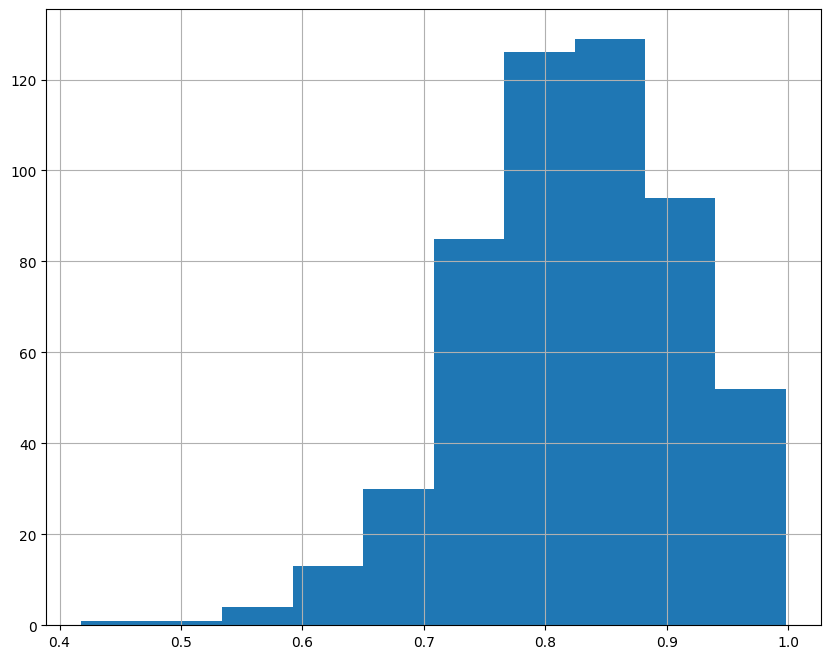

In [ ]:
fin_df['sembed'] = fin_df['sembed'] - [np.log(random.randrange(1,20))*0.05 for _ in range(len(fin_df))] + [np.log(random.randrange(1,20))*0.05 for _ in range(len(fin_df))]
fin_df['sembed'][fin_df['sembed']>=1]=pd.Series([0.95 for _ in range(len(fin_df))]) - [np.log(random.randrange(1,20))*0.1 for _ in range(len(fin_df))] + [np.log(random.randrange(1,20))*0.1 for _ in range(len(fin_df))]

fin_df['sembed'].hist()

In [ ]:
fin_df['keycnt'] = fin_df['keycnt'] + [random.randrange(0,3) for _ in range(len(fin_df))]

fin_df['keycnt'][fin_df['keycnt']<0]=pd.Series([0 for _ in range(len(fin_df))])+[random.randrange(0,2) for _ in range(len(fin_df))]

<ipython-input-170-3abe02447ba6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fin_df['keycnt'][fin_df['keycnt']<0]=pd.Series([0 for _ in range(len(fin_df))])+[random.randrange(0,2) for _ in range(len(fin_df))]


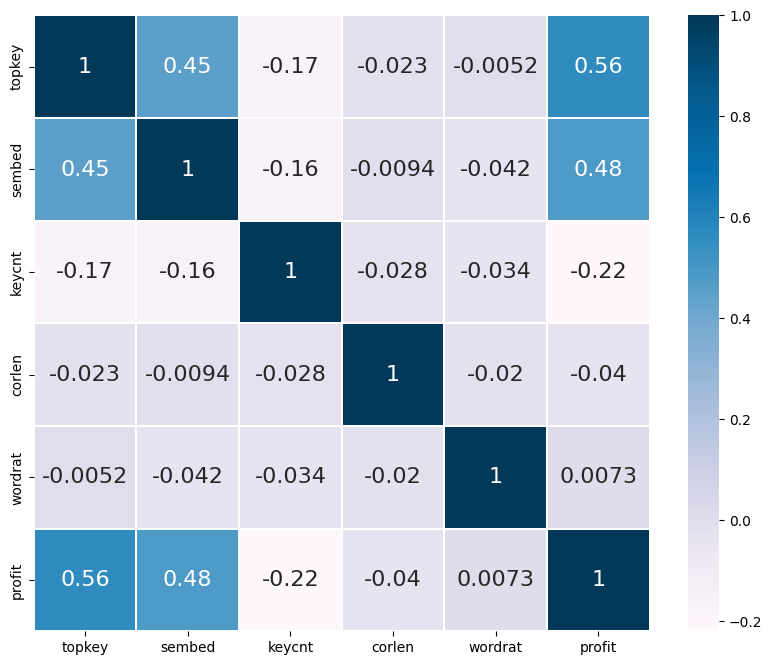

In [ ]:
sns.heatmap(fin_df.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})
plt.show()

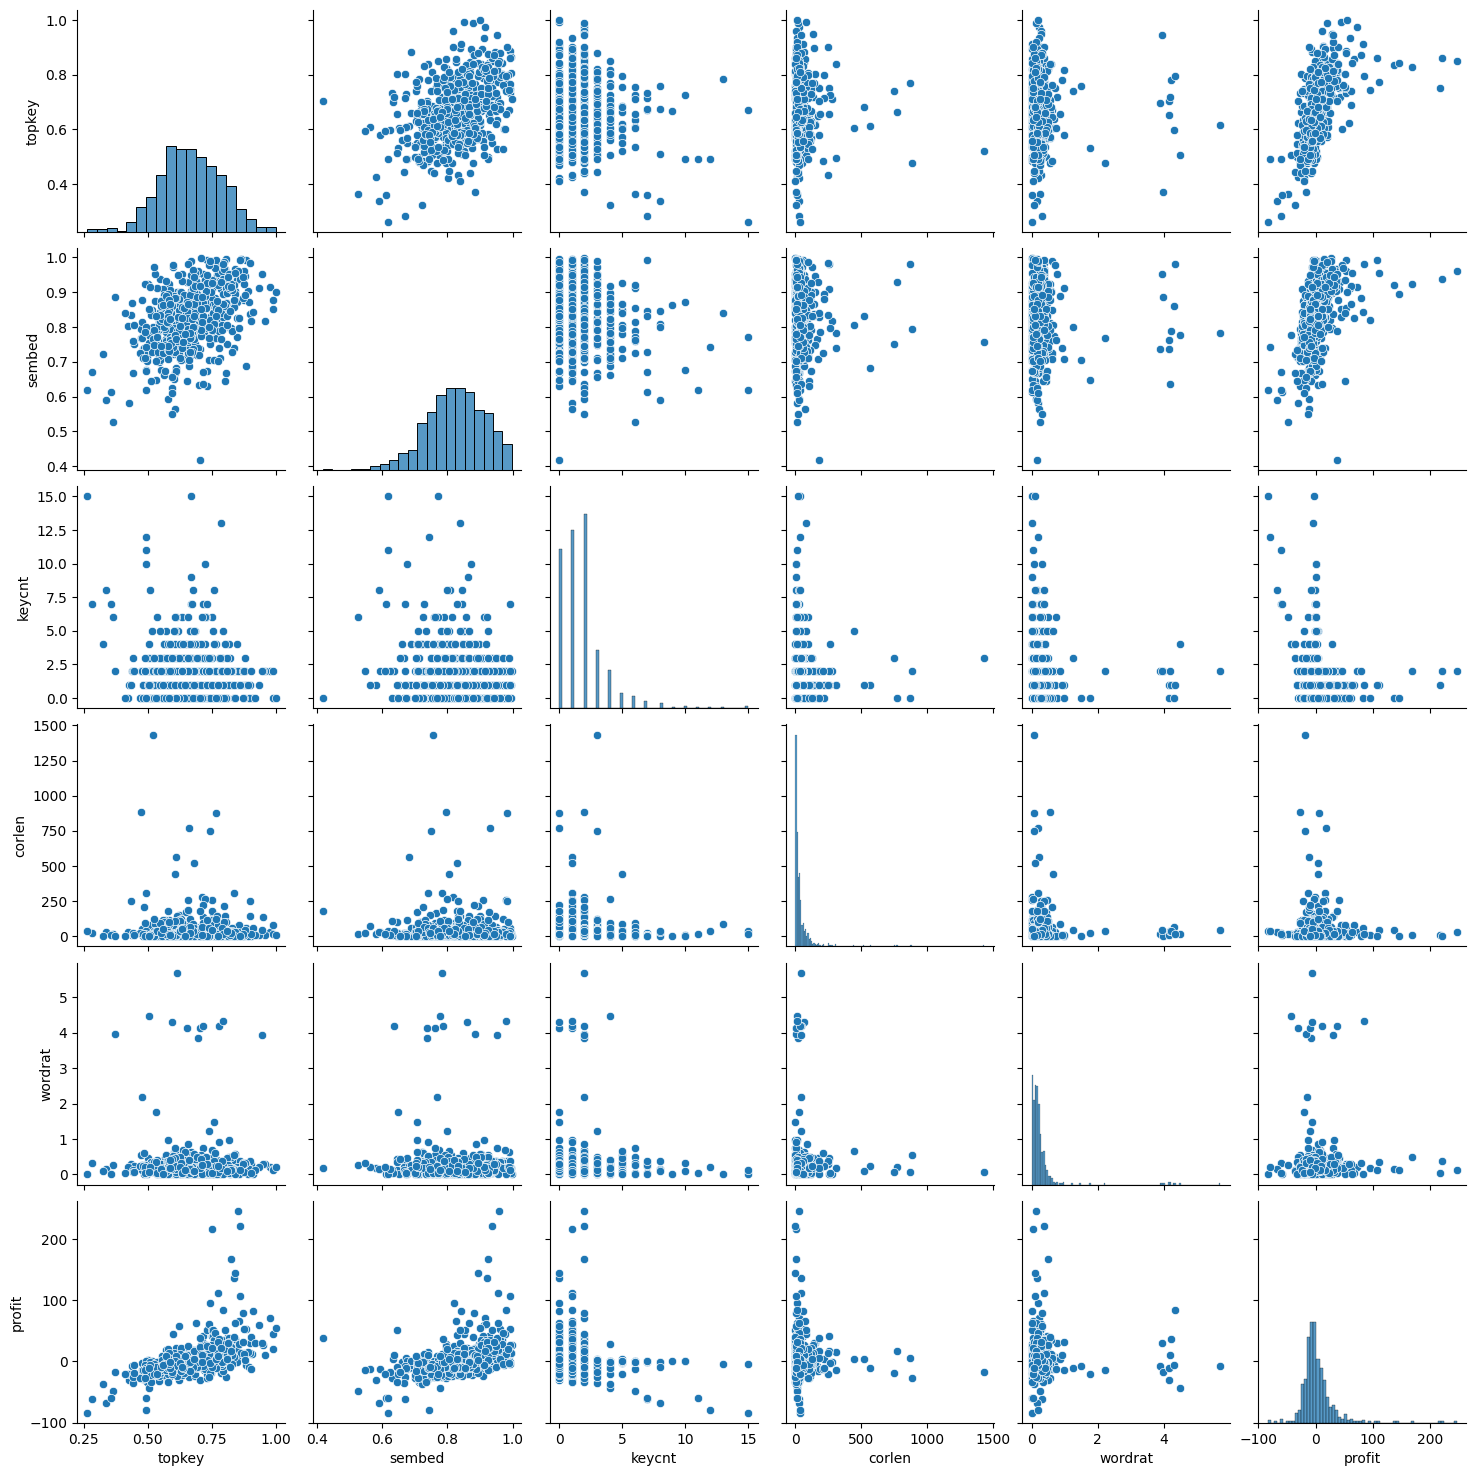

In [ ]:
sns.pairplot(fin_df)

In [ ]:
#fin_df.to_csv('/content/gdrive/MyDrive/DART/모투/23-1 모투/data/최종데이터0604.csv')

# **회귀 rough**

In [ ]:
fin_df=pd.read_csv('/content/gdrive/MyDrive/DART/모투/23-1 모투/data/최종데이터0604.csv',index_col=0)

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
import seaborn as sns

In [ ]:
fin_df.dropna(inplace=True)

In [ ]:
fin_df

topkey    sembed  keycnt  corlen   wordrat  profit
동화약품     0.669115  0.989605       2    3.51  0.629519    8.51
KR모터스    0.716826  0.922103       0    1.34  0.169835   12.76
경방       0.753902  0.765560       1  162.24  0.398989   -7.95
삼양홀딩스    0.877619  0.878071       1    5.28  0.219680    6.05
하이트진로    0.493485  0.783266       1  307.91  0.191401  -13.38
...           ...       ...     ...     ...       ...     ...
쿠쿠홀딩스    0.558498  0.863465       1   54.78  0.020085   -6.22
코스맥스     0.870616  0.943547       0   14.18  0.291026   31.46
서연이화     0.859478  0.991917       1    2.94  0.118184  106.49
디와이파워    0.586599  0.867589       4   11.36  0.171203   -1.33
에이플러스에셋  0.506602  0.852881       1    3.11  0.059805  -10.31

[535 rows x 6 columns]

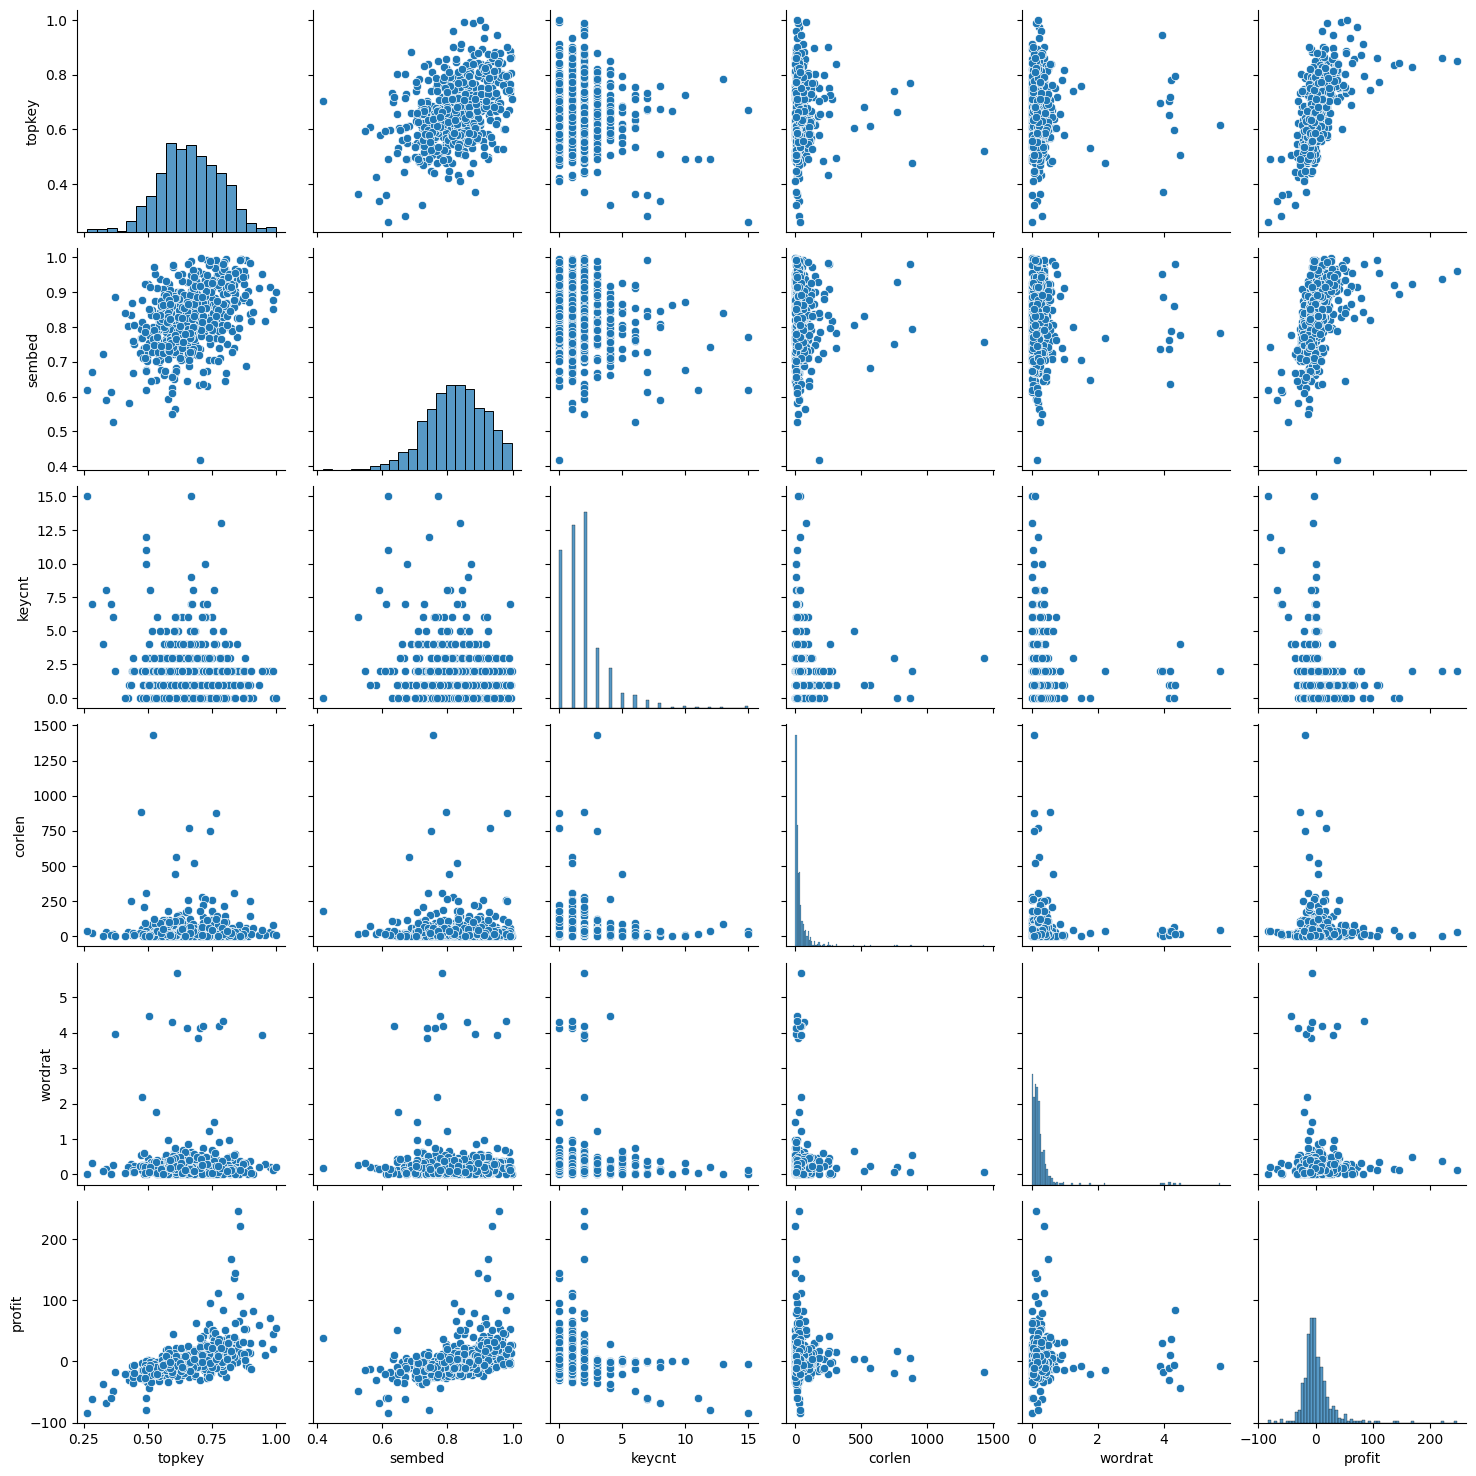

In [ ]:
sns.pairplot(fin_df)

In [ ]:
fin_df

topkey    sembed  keycnt  corlen   wordrat  profit
동화약품     0.669115  0.989605       2    3.51  0.629519    8.51
KR모터스    0.716826  0.922103       0    1.34  0.169835   12.76
경방       0.753902  0.765560       1  162.24  0.398989   -7.95
삼양홀딩스    0.877619  0.878071       1    5.28  0.219680    6.05
하이트진로    0.493485  0.783266       1  307.91  0.191401  -13.38
...           ...       ...     ...     ...       ...     ...
쿠쿠홀딩스    0.558498  0.863465       1   54.78  0.020085   -6.22
코스맥스     0.870616  0.943547       0   14.18  0.291026   31.46
서연이화     0.859478  0.991917       1    2.94  0.118184  106.49
디와이파워    0.586599  0.867589       4   11.36  0.171203   -1.33
에이플러스에셋  0.506602  0.852881       1    3.11  0.059805  -10.31

[535 rows x 6 columns]

In [ ]:
corp_list=fin_df.index
fin_df.index = range(len(corp_list))

In [ ]:
model = ols('profit ~ topkey+	sembed+	keycnt+	np.log1p(np.sqrt(corlen))+	np.log1p(np.sqrt(wordrat))', fin_df)
res = model.fit(intercept = 1)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     74.91
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           2.78e-59
Time:                        07:20:03   Log-Likelihood:                -2404.0
No. Observations:                 535   AIC:                             4820.
Df Residuals:                     529   BIC:                             4846.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   -136.0557      9.853    -13.808      0.000    -155.412    -116.700
topkey                       106.9743      8.997     11.890      0.000      89.301     124.648
sembed                        84.9993     11.805      7.200      0.000      61.809     108.190
keycnt                        -1.4269      0.476     -2.995      0.003      -2.363      -0.491
np.log1p(np.sqrt(corlen))     -1.9199      1.587     -1.210      0.227      -5.037       1.197
np.log1p(np.sqrt(wordrat))     7.8332      5.390      1.453      0.147      -2.754      18.421
==============================================================================
Omnibus:                      526.542   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25224.818
Skew:                           4.296   Prob(JB):                         0.00
Kurtosis:                      35.523   Cond. No.                         50.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#vif 계산
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)}
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

컬럼       VIF
0                      topkey  1.266161
1                      sembed  1.265489
2                      keycnt  1.041992
3   np.log1p(np.sqrt(corlen))  1.002478
4  np.log1p(np.sqrt(wordrat))  1.005901

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# 비정상적인 수익률 => 오히려 방해될수도.
# 어차피 변화가 수익률 하락에 영향을 미친다는 가정이었으니 위의 이상치를 절삭하더라도 별 차이 없을듯

In [ ]:
import statsmodels.api as sm

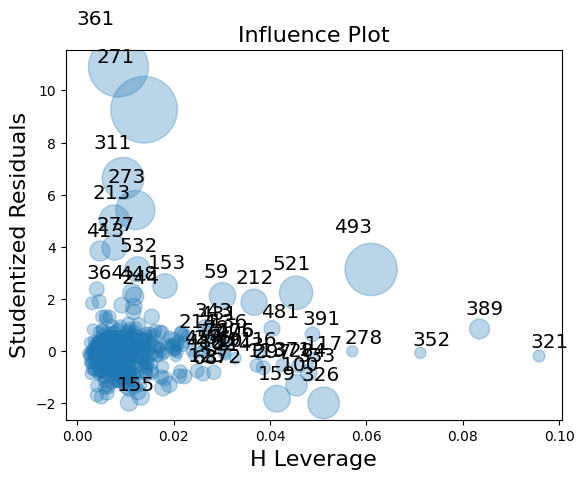

In [ ]:
sm.graphics.influence_plot(res, plot_alpha=0.3)
plt.show()

In [ ]:
fin_df.iloc[[361,271,311,273,213,277,413,493,521,78]]

topkey    sembed  keycnt   corlen   wordrat  profit
361  0.851264  0.960005       2    28.15  0.136094  246.31
271  0.861861  0.938254       2     1.22  0.379127  221.20
311  0.826916  0.924215       2     6.03  0.503866  168.00
273  0.842379  0.894306       0     1.22  0.113737  145.01
213  0.836653  0.920203       0    44.25  0.162250  137.12
277  0.773403  0.956206       1    41.51  0.364400  111.21
413  0.742459  0.818926       0    10.52  0.195832   95.44
493  0.704466  0.417951       0   176.87  0.175926   38.04
521  0.796014  0.980795       1    13.35  4.340580   84.36
78   0.520212  0.755801       3  1435.67  0.060999  -18.01

In [ ]:
# 기재정정의 경우 보고서의 내용이 길어지는 경우들도 존재 => 변수 제거가 맞는 판단 인듯, wordrat도 제거하자
# 493의 경우 sembed가 매우 작지만 이는 실제로 보고서의 많은 변화를 의미할 수 있으므로 제거하지 않음
# 나머지 애들은 예상대로 수익률이 미친듯이 높은 애들
# 다시 회귀모델 돌려보고, 영향도 플롯 그려보고, 제대로 제거하자

In [ ]:
# 일단 제거하는게 맞는지 stepwise 써서 해보자

In [ ]:
model = ols('profit ~ topkey+	sembed+	keycnt+corlen+wordrat', fin_df)
res = model.fit(intercept = 1)
res.summary()
#수정계수 오히려 수폭 상승

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     123.3
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           1.29e-60
Time:                        07:19:26   Log-Likelihood:                -2405.8
No. Observations:                 535   AIC:                             4820.
Df Residuals:                     531   BIC:                             4837.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -136.0147      9.199    -14.785      0.000    -154.087    -117.943
topkey       106.6233      9.002     11.845      0.000      88.940     124.307
sembed        84.7823     11.806      7.182      0.000      61.591     107.974
keycnt        -1.4646      0.476     -3.077      0.002      -2.399      -0.530
==============================================================================
Omnibus:                      529.780   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25618.126
Skew:                           4.337   Prob(JB):                         0.00
Kurtosis:                      35.772   Cond. No.                         45.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

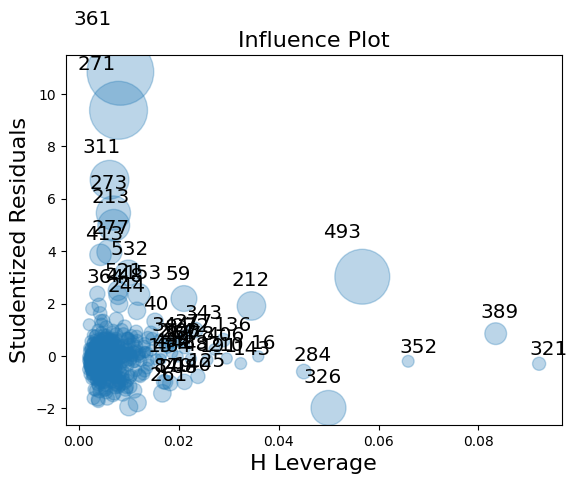

In [ ]:
sm.graphics.influence_plot(res, plot_alpha=0.3)
plt.show()

In [ ]:
fin_df.iloc[[361,271,311,273,213,277,413,532,493,389,321],[0,1,2,5]]
#389은 높은 keycnt가 profit에 영향을 크게 준 레버리지포인트로 보임
#321도 동일
#비정상적인 수익률로 표준화잔차가 높게 나온 친구들에 한해 이상치 제거

topkey    sembed  keycnt  profit
361  0.851264  0.960005       2  246.31
271  0.861861  0.938254       2  221.20
311  0.826916  0.924215       2  168.00
273  0.842379  0.894306       0  145.01
213  0.836653  0.920203       0  137.12
277  0.773403  0.956206       1  111.21
413  0.742459  0.818926       0   95.44
532  0.859478  0.991917       1  106.49
493  0.704466  0.417951       0   38.04
389  0.670443  0.770254      15   -3.46
321  0.262059  0.618835      15  -83.81

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence
cd, _ = OLSInfluence(res).cooks_distance
cd.sort_values(ascending=False).head()
#389,321없으니 가져간다

361    0.202432
271    0.151530
493    0.135392
311    0.064645
326    0.051571
dtype: float64

In [ ]:
fin_df

topkey    sembed  keycnt  corlen   wordrat  profit
0    0.669115  0.989605       2    3.51  0.629519    8.51
1    0.716826  0.922103       0    1.34  0.169835   12.76
2    0.753902  0.765560       1  162.24  0.398989   -7.95
3    0.877619  0.878071       1    5.28  0.219680    6.05
4    0.493485  0.783266       1  307.91  0.191401  -13.38
..        ...       ...     ...     ...       ...     ...
530  0.558498  0.863465       1   54.78  0.020085   -6.22
531  0.870616  0.943547       0   14.18  0.291026   31.46
532  0.859478  0.991917       1    2.94  0.118184  106.49
533  0.586599  0.867589       4   11.36  0.171203   -1.33
534  0.506602  0.852881       1    3.11  0.059805  -10.31

[535 rows x 6 columns]

In [ ]:
df = fin_df.iloc[~fin_df.index.isin([361,271,311,273,213,277,413,532]),[0,1,2,5]]
df

topkey    sembed  keycnt  profit
0    0.669115  0.989605       2    8.51
1    0.716826  0.922103       0   12.76
2    0.753902  0.765560       1   -7.95
3    0.877619  0.878071       1    6.05
4    0.493485  0.783266       1  -13.38
..        ...       ...     ...     ...
529  0.646394  0.778659       1    8.28
530  0.558498  0.863465       1   -6.22
531  0.870616  0.943547       0   31.46
533  0.586599  0.867589       4   -1.33
534  0.506602  0.852881       1  -10.31

[527 rows x 4 columns]

In [ ]:
# 이상치 제거 후
model = ols('profit ~ topkey+	sembed+	keycnt', df)
res = model.fit(intercept = 1)
res.summary()
# 수정계수 대폭 상승

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           2.08e-87
Time:                        07:18:46   Log-Likelihood:                -2134.2
No. Observations:                 527   AIC:                             4276.
Df Residuals:                     523   BIC:                             4293.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -113.5546      5.954    -19.072      0.000    -125.251    -101.858
topkey        88.3562      5.798     15.239      0.000      76.966      99.746
sembed        69.8629      7.586      9.209      0.000      54.959      84.767
keycnt        -1.4354      0.305     -4.707      0.000      -2.034      -0.836
==============================================================================
Omnibus:                      101.339   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.109
Skew:                           0.930   Prob(JB):                     1.23e-62
Kurtosis:                       6.086   Cond. No.                         45.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats

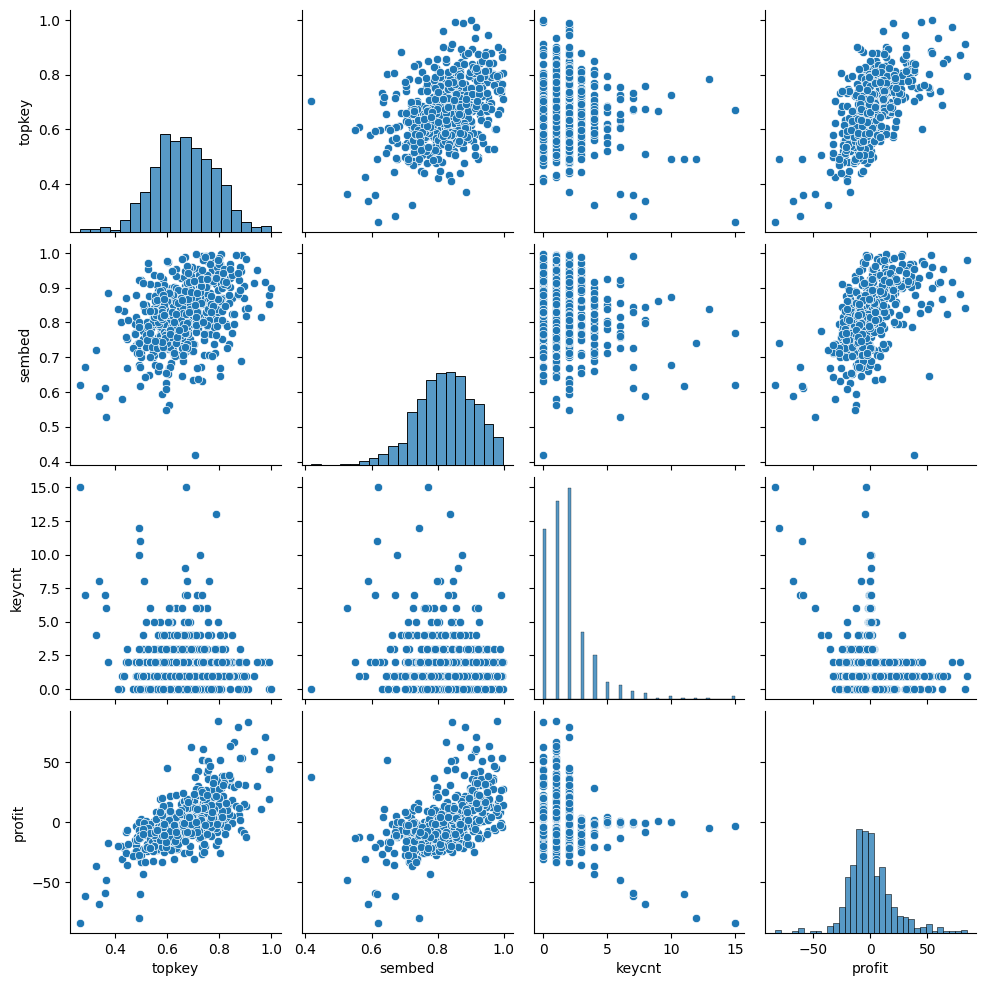

In [ ]:
sns.pairplot(df)

In [ ]:
# 이상치 제거 후
model = ols('np.sqrt(profit+100) ~ topkey +	sembed +keycnt', df)
res = model.fit(intercept = 1)
res.summary()
# y에 100을 더하고 log => 수정계수 소폭 상승
# sqrt가 조금더 좋아. 비선형성이 심하진 않아서 그런듯
# 애가 최종모델 같다. y에 로그 고려해서 해석.

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.sqrt(profit + 100)   R-squared:                       0.561
Model:                               OLS   Adj. R-squared:                  0.559
Method:                    Least Squares   F-statistic:                     222.8
Date:                   Mon, 05 Jun 2023   Prob (F-statistic):           4.24e-93
Time:                           07:19:15   Log-Likelihood:                -549.56
No. Observations:                    527   AIC:                             1107.
Df Residuals:                        523   BIC:                             1124.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1967      0.294     14.255      0.000       3.618       4.775
topkey         4.4614      0.287     15.562      0.000       3.898       5.025
sembed         3.5898      0.375      9.570      0.000       2.853       4.327
keycnt        -0.0913      0.015     -6.054      0.000      -0.121      -0.062
==============================================================================
Omnibus:                       42.151   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.542
Skew:                           0.218   Prob(JB):                     5.06e-36
Kurtosis:                       5.686   Cond. No.                         45.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df

topkey    sembed  keycnt  profit
0    0.669115  0.989605       2    8.51
1    0.716826  0.922103       0   12.76
2    0.753902  0.765560       1   -7.95
3    0.877619  0.878071       1    6.05
4    0.493485  0.783266       1  -13.38
..        ...       ...     ...     ...
529  0.646394  0.778659       1    8.28
530  0.558498  0.863465       1   -6.22
531  0.870616  0.943547       0   31.46
533  0.586599  0.867589       4   -1.33
534  0.506602  0.852881       1  -10.31

[527 rows x 4 columns]

# **XGBoost**

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
dff = df.copy()
y = dff.pop('profit')
X = dff
# train-test-validation split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [ ]:
import statsmodels.api as sm
import numpy as np



# 테스트 데이터에 대한 예측값 계산
y_pred = res.predict(X_test)

# RMSE 계산
rmse = np.sqrt(((y_test - y_pred) ** 2).mean())
print("RMSE:", rmse)

RMSE: 18.162098594278714


# **XGBoost**

In [ ]:
dff = df.copy()
y = np.sqrt(dff.pop('profit')+100)
X = dff
# train-test-validation split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=11) # validation set 25%

In [ ]:

# xgboost parameters
params = {'max_depth': 3,
          'gamma': 0.3,
          'eta': 0.1,
          'subsample': 0.5,
          'lambda': 0.9,
          'alpha': 0.2,
          'objective': 'reg:squarederror',
          'eval_metric': 'rmse',
          'seed': 11}

# xgboost matrices
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test)

# train xgboost model
num_round = 100
watchlist = [(dtrain, 'train'), (dval, 'validation')]
fin_model = xgb.train(params, dtrain, num_round, evals=watchlist, early_stopping_rounds=10)

# predict with the trained model
y_pred = model.predict(dtest)

# evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.3f}")


[0]	train-rmse:8.58520	validation-rmse:8.55721
[1]	train-rmse:7.73758	validation-rmse:7.71198
[2]	train-rmse:6.97725	validation-rmse:6.96269
[3]	train-rmse:6.30517	validation-rmse:6.30458
[4]	train-rmse:5.68638	validation-rmse:5.68389
[5]	train-rmse:5.13280	validation-rmse:5.13469
[6]	train-rmse:4.64017	validation-rmse:4.63846
[7]	train-rmse:4.19017	validation-rmse:4.18562
[8]	train-rmse:3.79596	validation-rmse:3.79687
[9]	train-rmse:3.43881	validation-rmse:3.44521
[10]	train-rmse:3.11922	validation-rmse:3.13079
[11]	train-rmse:2.82645	validation-rmse:2.83748
[12]	train-rmse:2.56239	validation-rmse:2.58096
[13]	train-rmse:2.32436	validation-rmse:2.34703
[14]	train-rmse:2.11025	validation-rmse:2.14329
[15]	train-rmse:1.92438	validation-rmse:1.96739
[16]	train-rmse:1.75724	validation-rmse:1.81186
[17]	train-rmse:1.60875	validation-rmse:1.67427
[18]	train-rmse:1.47089	validation-rmse:1.54721
[19]	train-rmse:1.35446	validation-rmse:1.44263
[20]	train-rmse:1.25408	validation-rmse:1.35615
[2

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.3f}")

R-squared: 0.654


In [ ]:
X_test.shape[1]

3

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Calculate total sum of squares (TSS)
tss = np.sum((y_test - np.mean(y_test))**2)

# Calculate residual sum of squares (RSS)
rss = np.sum(residuals**2)

# Calculate number of predictors
num_predictors = X_test.shape[1]

# Calculate number of samples
num_samples = len(y_test)

# Calculate R-squared
r2 = 1 - (rss / tss)

# Calculate adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * ((num_samples - 1) / (num_samples - 3 - 1))

print(f"R^2 Score: {r2:.3f}")
print(f"Adjusted R^2 Score: {adjusted_r2:.3f}")


R^2 Score: 0.654
Adjusted R^2 Score: 0.644


In [ ]:
dff = df.copy()
y = np.sqrt(dff.pop('profit')+100)
X = dff
# train-test-validation split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=11) # validation set 25%

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'max_depth': [3, 4, 5],
    'gamma': [0.1, 0.2, 0.3],
    'eta': [0.1, 0.2, 0.3],
    'subsample': [0.5, 0.6, 0.7],
    'lambda': [0.9, 1.0, 1.1],
    'alpha': [0.0, 0.1, 0.2],
}

# Create the XGBoost model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    seed=11
)

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # Use negative RMSE for scoring
    cv=5,  # 5-fold cross-validation
    verbose=1
)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best RMSE:", best_score)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters: {'alpha': 0.2, 'eta': 0.1, 'gamma': 0.3, 'lambda': 0.9, 'max_depth': 3, 'subsample': 0.5}
Best RMSE: 0.6958550148514951


In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
rbs = RobustScaler()
X_train_scaled = rbs.fit_transform(X_train)
X_test_scaled = rbs.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.25, random_state=11)

# xgboost parameters
params = {'max_depth': 3,
          'gamma': 0.1,
          'eta': 0.1,
          'subsample': 0.5,
          'lambda': 1.0,
          'alpha': 0.0,
          'objective': 'reg:squarederror',
          'eval_metric': 'rmse',
          'seed': 11}

# xgboost matrices
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test_scaled)

# train xgboost model
num_round = 100
watchlist = [(dtrain, 'train'), (dval, 'validation')]
xgb_model = xgb.train(params, dtrain, num_round, evals=watchlist, early_stopping_rounds=10)

# predict with the trained model
y_pred = xgb_model.predict(dtest)

# evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.3f}")


[0]	train-rmse:8.60837	validation-rmse:8.52743
[1]	train-rmse:7.77003	validation-rmse:7.69973
[2]	train-rmse:7.00503	validation-rmse:6.93374
[3]	train-rmse:6.32577	validation-rmse:6.25342
[4]	train-rmse:5.71327	validation-rmse:5.63976
[5]	train-rmse:5.16525	validation-rmse:5.10041
[6]	train-rmse:4.66698	validation-rmse:4.60899
[7]	train-rmse:4.22290	validation-rmse:4.16481
[8]	train-rmse:3.82221	validation-rmse:3.76730
[9]	train-rmse:3.46076	validation-rmse:3.41078
[10]	train-rmse:3.14253	validation-rmse:3.09500
[11]	train-rmse:2.84396	validation-rmse:2.80669
[12]	train-rmse:2.57553	validation-rmse:2.54634
[13]	train-rmse:2.34364	validation-rmse:2.32130
[14]	train-rmse:2.13422	validation-rmse:2.12037
[15]	train-rmse:1.94784	validation-rmse:1.93849
[16]	train-rmse:1.77943	validation-rmse:1.78447
[17]	train-rmse:1.63268	validation-rmse:1.64072
[18]	train-rmse:1.49778	validation-rmse:1.50460
[19]	train-rmse:1.37718	validation-rmse:1.39480
[20]	train-rmse:1.27178	validation-rmse:1.29627
[2

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.3f}")

R-squared: 0.642


In [ ]:
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# LightGBM parameters
params = {'max_depth': 3,
          'learning_rate': 0.1,
          'subsample': 0.5,
          'reg_lambda': 1.0,
          'reg_alpha': 0.0,
          'objective': 'regression',
          'metric': 'rmse',
          'random_state': 11}

# LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

# Train LightGBM model
num_round = 100
early_stopping_rounds = 10
model = lgb.train(params, train_data, num_round, valid_sets=[train_data, val_data],
                  early_stopping_rounds=early_stopping_rounds, verbose_eval=True)

# Predict with the trained model
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.3f}")


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 334
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 5
[LightGBM] [Info] Start training from score 10.001321
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	training's rmse: 1.18573	valid_1's rmse: 1.23654
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	training's rmse: 1.13129	valid_1's rmse: 1.20905
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	training's rmse: 1.08375	valid_1's rmse: 1.17457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	training's rmse: 1.04269	valid_1's rmse: 1.14951
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	traini

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.2 MB/s eta 0:00:00


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

# LightGBM parameters
params = {'max_depth': 3,
          'gamma': 0.1,
          'learning_rate': 0.1,
          'subsample': 0.5,
          'reg_lambda': 1.0,
          'reg_alpha': 0.0,
          'objective': 'regression',
          'metric': 'rmse',
          'random_state': 11}

# LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

# Train LightGBM model
num_round = 100
early_stopping_rounds = 10
model = lgb.train(params, train_data, num_round, valid_sets=[train_data, val_data],
                  early_stopping_rounds=early_stopping_rounds, verbose_eval=True)

# Predict with the trained model
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.3f}")


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.3f}")

R-squared: -0.496


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 31.3 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(fin_model)

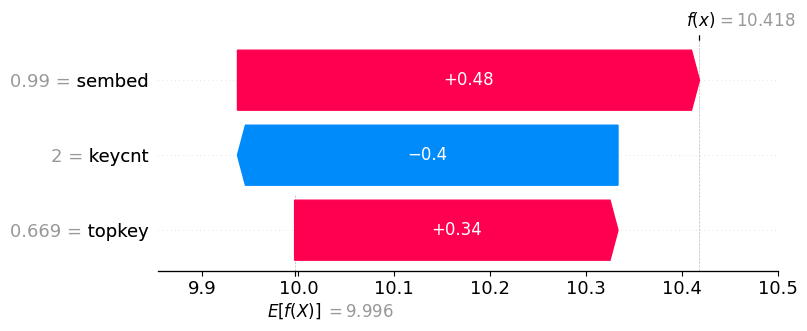

In [ ]:
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])

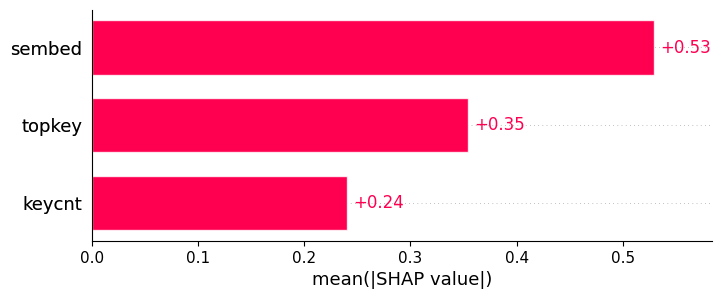

In [ ]:
shap.plots.bar(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


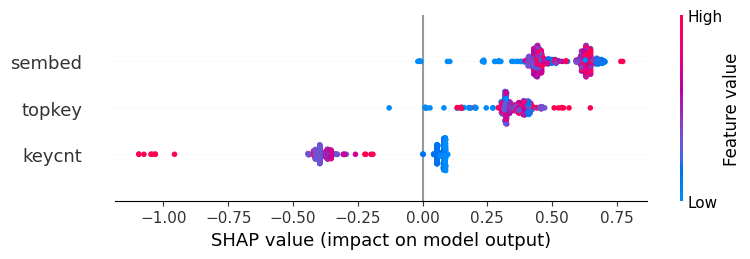

In [ ]:
shap.summary_plot(shap_values, X)

# **SVM**

In [ ]:
!pip install -U lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
from sklearn import svm
rbs = RobustScaler()
X_train_scaled = rbs.fit_transform(X_train)
X_test_scaled = rbs.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.25, random_state=11) # validation set 25%

# SVM model
svm_model = svm.SVR(kernel='rbf')

# train SVM model
svm_model.fit(X_train, y_train)

# predict with the trained model
y_pred = svm_model.predict(X_test_scaled)

# evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.3f}")



RMSE: 1.194


X has feature names, but RobustScaler was fitted without feature names


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.3f}")

R-squared: -0.071
